# Plotting a trajectory, velocity and acceleration vectors for a particle motion

Import necessary modules. 
In particular, besides standard numerical analysis packages such as numpy and matplotlib (which provide essentially a Matlab-like functionality), video writers are needed to generate the mpeg animation. Consult the associated 'Getting started' file for information on getting the video writers. 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation, rc, patches
from IPython.display import HTML

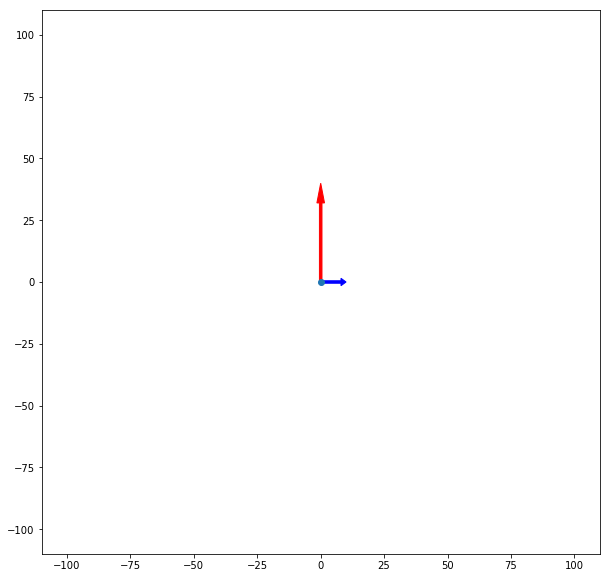

In [2]:
## Create figure and set up axes
##-------------------------------
fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, frameon=True)

## Set limits to the x and y axes
#ax.set_xlim(( -11, 11))
#ax.set_ylim((-11, 11))
ax.set_xlim(( -110, 110))
ax.set_ylim((-110, 110))


## Initialize particle and particle path
##---------------------------------------
x = 0
y = 0
P, = ax.plot(x, y, marker='o')
trajectory_x = []
trajectory_y = []
Path, = ax.plot(trajectory_x, trajectory_y, '-',color='black')

## Initialize vectors to plot
##---------------------------
velocity_vec = patches.Arrow(x, y, 0, 0, width=5,color='blue' )
ax.add_patch(velocity_vec)
#et_vec = patches.Arrow(x, y, 0, 0, width=0.5, color='blue' )
#ax.add_patch(et_vec)
acceleration_vec = patches.Arrow(x, y, 0, 0, width=5,color='red' )
ax.add_patch(acceleration_vec)
#acceleration_unitvec = patches.Arrow(x, y, 0, 0, width=0.5,color='red' )
#ax.add_patch(acceleration_unitvec)

## animation function. This is called sequentially
##------------------------------------------------
dt = 100 # ms
def update(frame):
    # get the time based on the dt and the frame
    t = frame*dt/1000. # convert dt from ms to s
    
    ##**************************************
    ## Function to describe particle motion
    ##
    ## Example: circular path in cartesian coordinates
    #x = 10*np.cos(t)
    #y = 10*np.sin(t)
    #dxdt = -10*np.sin(t)
    #dydt = 10*np.cos(t)
    #d2xdt2 = -10*np.cos(t)
    #d2ydt2 = -10*np.sin(t)
    
    ## Example 1.A.4
    ##
    # polar coordinates and derivatives
    theta_dot = 2 #rad/s
    theta = theta_dot*t
    r = 5*theta
    theta_dotdot = 0.0
    r_dot = 5*theta_dot
    r_dotdot = 0.0
    # change the position from polar to cartesian coordinates
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    # in order to plot the velocity and acceleration vectors
    # we are going to use the polar description, but the plotting package actually needs
    # the cartesian description, so we will have to change the basis vectors from the polar to the
    # cartesian description. To do so we first need to express the basis of the polar description
    # i.e., the vectors e_r and e_theta, in terms of their x and y components
    er_x = np.cos(theta)
    er_y = np.sin(theta)
    ethe_x = -np.sin(theta)
    ethe_y = np.cos(theta)
    # now we can use the expression for velocity from the polar description
    # but instead of e_r and e_theta we will use their cartesian components er_x, ethe_x, er_y, ethe_y
    # in this manner we will get the cartesian components of the velocity even though the expression
    # looks like the polar description
    v_x = r_dot*er_x + r*theta_dot*ethe_x
    v_y = r_dot*er_y + r*theta_dot*ethe_y
    # just renaming the velocity components to match the cartesian notation
    dxdt = v_x
    dydt = v_y
    # similarly, for the acceleration vector, we are using the polar description but also
    # changing from e_r and e_theta to the x and y components
    a_x = (r_dotdot-r*theta_dot**2)*er_x + (r*theta_dotdot+2*r_dot*theta_dot)*ethe_x
    a_y = (r_dotdot-r*theta_dot**2)*er_y + (r*theta_dotdot+2*r_dot*theta_dot)*ethe_y
    # renaming to match the cartesian description
    d2xdt2 = a_x
    d2ydt2 = a_y
    ##**************************************
    
    ## Plotting the vectors 
    ##
    # For example maybe we want to plot the unit tangent vector, that vector
    # can be computed based on the velocity vector, just dividing by the magnitude of
    # the velocity
    et_i = dxdt/(np.sqrt(dxdt**2+dydt**2))
    et_j = dydt/(np.sqrt(dxdt**2+dydt**2))
    # Maybe we also want the unit vector in the direction of the acceleration
    # Note that this is not one of the basis vectors. Remember that the acceleration has a tangent
    # and a normal component, so this unit vector is neither the tangent nor the normal
    a_unitvec_i = d2xdt2/(np.sqrt(d2xdt2**2+d2ydt2**2))
    a_unitvec_j = d2ydt2/(np.sqrt(d2xdt2**2+d2ydt2**2))
    # To actually plot the vectors you need to remove the old vector from the plot and create a new one
    # In the following, only the velocity and acceleration are plotted and the rest is commented
    # But you can plot other vector if you want. Note that to plot the vector you need 4 arguments,
    # you need to give the (x,y) coordinates where the vector will begin, and then the actual components
    # of the vector.
    global velocity_vec
    ax.patches.remove(velocity_vec) 
    velocity_vec = plt.Arrow(x, y, dxdt, dydt, width=5,color='blue' )
    ax.add_patch(velocity_vec)
    #global et_vec
    #ax.patches.remove(et_vec) 
    #et_vec = plt.Arrow(x, y, et_i, et_j,width=0.5,color='blue' )
    #ax.add_patch(et_vec)
    global acceleration_vec
    ax.patches.remove(acceleration_vec) 
    acceleration_vec = plt.Arrow(x, y, d2xdt2, d2ydt2, width=5,color='red' )
    ax.add_patch(acceleration_vec)
    #global acceleration_unitvec
    #ax.patches.remove(acceleration_unitvec) 
    #acceleration_unitvec = plt.Arrow(x, y, a_unitvec_i, a_unitvec_j, width=0.5,color='red' )
    #ax.add_patch(acceleration_unitvec)
    
    # Plotting the particle and the trajectory
    # The trajectory is acheived by keeping track of all previous particle positions
    trajectory_x.append(x)
    trajectory_y.append(y)
    Path.set_data(trajectory_x,trajectory_y)
    P.set_data(x,y)


# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, update,interval=dt,frames=100)

In [3]:
HTML(anim.to_html5_video())